In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale



In [98]:
df = wrangle.wrangle_churn()
df.head()
df_sub = df[['monthly_charges','tenure','total_charges','internet_type']]

In [5]:
#train, test = train_test_split(df,train_size=.75,random_state=123)

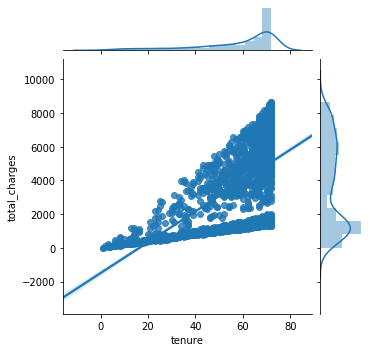

In [8]:
j = sns.jointplot("tenure","total_charges",data=df,kind='reg',height=5)

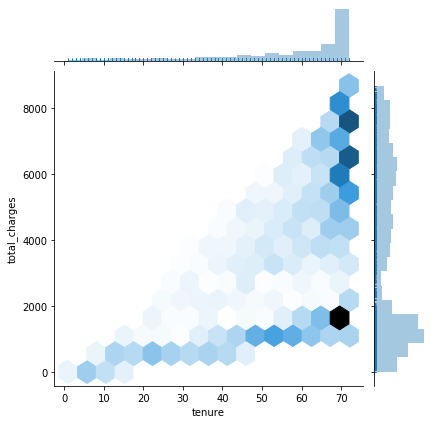

In [10]:
sns.jointplot(x=df['tenure'],y=df['total_charges'],kind='hex',marginal_kws=dict(bins=20,rug=True))

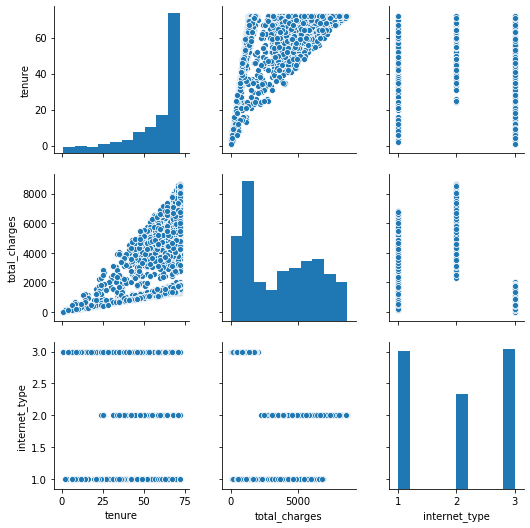

In [24]:
df_sub = df[['tenure','total_charges','internet_type']]
g = sns.pairplot(df_sub)

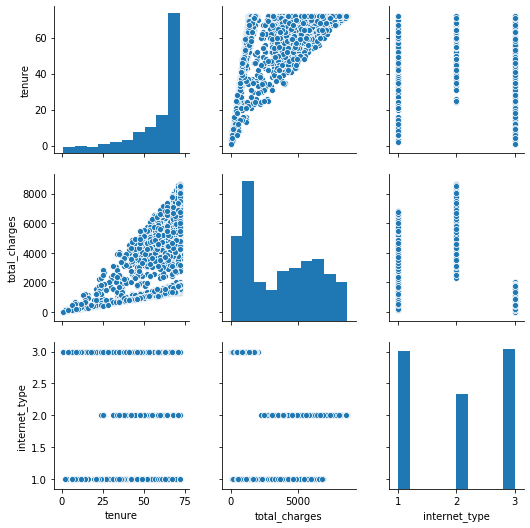

In [25]:
g = sns.pairplot(df_sub)

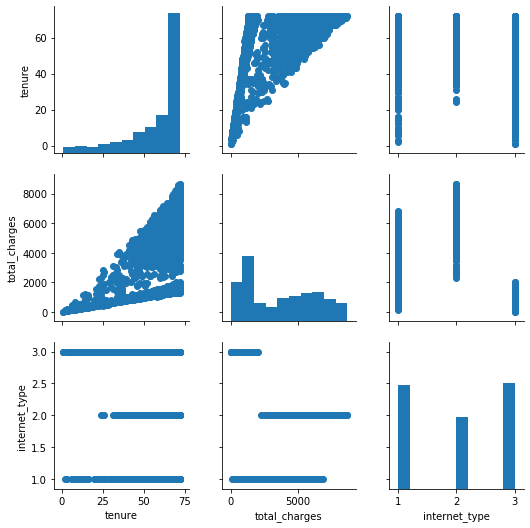

In [28]:
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)
a = sns.PairGrid(df_sub)
a.map_diag(plt.hist)
a.map_offdiag(plt.scatter)



In [33]:
def plot_variable_pairs(df):
    return sns.PairGrid(df).map_diag(plt.hist).map_offdiag(plt.scatter)

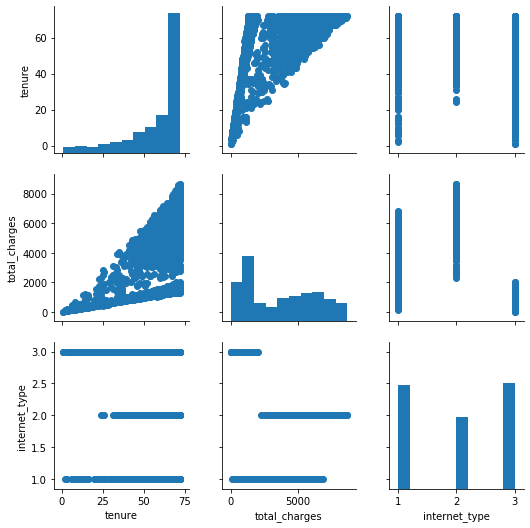

In [34]:
plot_variable_pairs(df_sub)

In [79]:
def months_to_years(df):
    df['tenure_year'] = round(df.tenure/12).astype('category')
    return df
    
     
    

In [86]:
#months_to_years(df).head(1)
#df.tenure_year = round(df.tenure_year,0)
#df['internet'] = df.no_internet == Fals

In [66]:
df['no_internet'] = df.internet_type == 3

In [87]:
def plot_categorical_and_continuous_vars(categorical_var,continuous_var,df):
    
    

NameError: name 'plot_categorical_and_continuous_vars' is not defined

In [111]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_sub,train_size=.8,random_state=123)
train = pd.DataFrame(train)

In [93]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, PowerTransformer

In [100]:
scaler = MinMaxScaler(copy=True,feature_range=(0,1)).fit(train)

In [103]:
scaled_train = pd.DataFrame(scaler.transform(train),columns=train.columns.values).set_index([train.index.values])

In [104]:
scaled_train.describe()

,monthly_charges,tenure,total_charges,internet_type
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.423729,0.792640,0.429975,0.502596
std,0.346356,0.245756,0.297225,0.431448
min,0.000000,0.000000,0.000000,0.000000
25%,0.054684,0.676056,0.145274,0.000000
50%,0.458396,0.887324,0.429300,0.500000
75%,0.720354,0.985915,0.689697,1.000000
max,1.000000,1.000000,1.000000,1.000000


ValueError: `bins` must increase monotonically, when an array

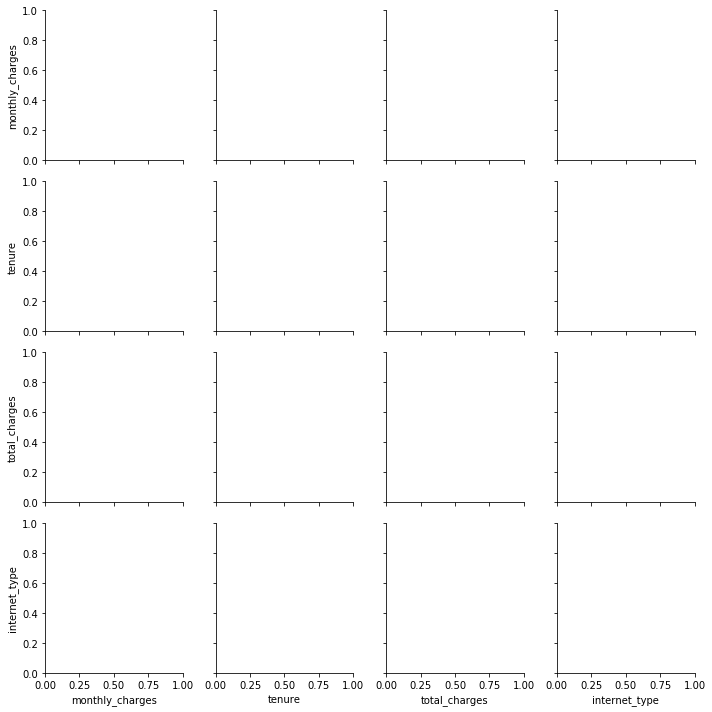

In [112]:
g = sns.PairGrid(train)
g.map_offdiag(plt.hist)
g.map_diag(plt.scatter)

In [109]:
train.drop(columns=['internet_type'])

,monthly_charges,tenure,total_charges
119,75.50,70,5212.65
1414,20.30,55,1079.05
384,109.05,65,7108.20
1131,98.30,70,6859.50
1494,116.25,71,8564.75
433,111.75,68,7511.30
566,57.50,57,3265.95
651,39.70,50,1932.75
748,107.60,62,6912.70
569,70.80,68,4859.95
